In [1]:
import tensorflow as tf
import keras

In [7]:
(x_train, y_train), (X_test, y_test) = keras.datasets.california_housing.load_data()

In [9]:
print(f"입력: {x_train[0]}")
print(f"타깃: {y_train[0]}")

입력: [-118.27     34.09     52.     2327.      555.     1048.      491.
    3.7847]
타깃: 252300.0


In [11]:
num_val_data = 1500
x_val, y_val = x_train[-num_val_data:], y_train[-num_val_data:]
x_train, y_train = x_train[:-num_val_data], y_train[:-num_val_data]

In [13]:
inputs = keras.Input(shape = (8, ))
x = keras.layers.Dense(32, activation = "relu")(inputs)
x = keras.layers.Dense(32, activation = "relu")(x)
x = keras.layers.Dense(16, activation = "relu")(x)
x = keras.layers.Dense(1)(x)
outputs = keras.layers.Dense(1)(x)

model = keras.Model(inputs = inputs, outputs = outputs)

In [17]:
model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics = ["mae"],
)

In [21]:
history = model.fit(
    x = x_train, 
    y = y_train,
    batch_size = 32,
    epochs = 30,
    validation_data = (x_val, y_val),
)

Epoch 1/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 45000028160.0000 - mae: 175020.4062 - val_loss: 25064990720.0000 - val_mae: 116269.4375
Epoch 2/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24384862208.0000 - mae: 111658.5859 - val_loss: 21238157312.0000 - val_mae: 106175.1719
Epoch 3/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19973933056.0000 - mae: 101161.7656 - val_loss: 14591612928.0000 - val_mae: 89482.1641
Epoch 4/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13231161344.0000 - mae: 85315.7266 - val_loss: 11282833408.0000 - val_mae: 82834.3828
Epoch 5/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10995962880.0000 - mae: 81951.8203 - val_loss: 10911071232.0000 - val_mae: 82399.5312
Epoch 6/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10971510784.0000 - mae: 82474.5625 - val_loss: 10722008064.0000 - val_mae: 80659.6094
Epoch 7/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10604377088.0000 - mae: 80784.9844 - val_loss: 10402223104.

In [23]:
history.history

{'loss': [35250462720.0,
  24023654400.0,
  18273480704.0,
  12220113920.0,
  10940789760.0,
  10698188800.0,
  10496199680.0,
  10317328384.0,
  10127748096.0,
  9947978752.0,
  9750412288.0,
  9568775168.0,
  9366726656.0,
  9129878528.0,
  8921077760.0,
  8721839104.0,
  8509623808.0,
  8301573120.0,
  8102360064.0,
  7950862336.0,
  7800083968.0,
  7662549504.0,
  7554866176.0,
  7428353536.0,
  7279302144.0,
  7198415872.0,
  7103646720.0,
  7023271424.0,
  6960352256.0,
  6834553856.0],
 'mae': [144387.03125,
  110947.25,
  96793.015625,
  83796.40625,
  81797.0703125,
  81087.0703125,
  80192.3828125,
  79544.2578125,
  78885.4140625,
  78091.21875,
  77310.2578125,
  76620.4296875,
  75786.40625,
  74787.5078125,
  73882.5625,
  72963.984375,
  72020.34375,
  71004.734375,
  70071.8515625,
  69353.25,
  68544.8671875,
  67890.9609375,
  67339.40625,
  66610.4609375,
  65832.7109375,
  65387.859375,
  64809.91015625,
  64404.21484375,
  63969.76171875,
  63406.80078125],
 'val_l

In [27]:
test_results = model.evaluate(x = X_test, y = y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7138788864.0000 - mae: 64022.5781


In [29]:
print(f"test loss, test mae: {test_results}")

test loss, test mae: [6818640384.0, 62846.21875]


In [33]:
predictions = model.predict(X_test)
predictions

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step


array([[181344.33],
       [154113.94],
       [176538.34],
       ...,
       [207369.28],
       [184189.81],
       [216115.05]], dtype=float32)

In [35]:
import matplotlib.pyplot as plt

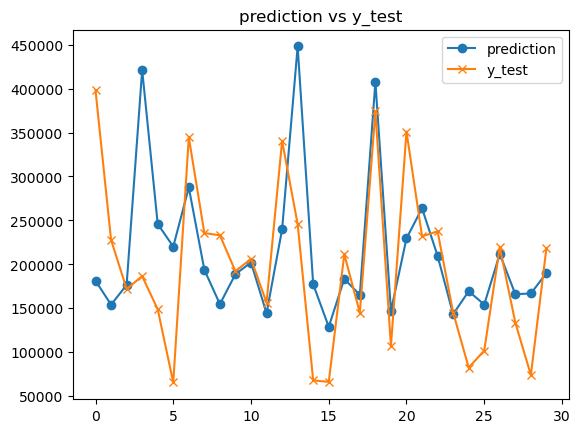

In [37]:
num_data = 30
plt.plot(predictions[:num_data], label = "prediction", marker = "o")
plt.plot(y_test[:num_data], label = "y_test", marker = "x")
plt.title("prediction vs y_test")
plt.legend()
plt.show()